In [136]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def calc_acq_time_array_manual_input(power_wheel_position, pos_vs_acqtime):
    pos,time = np.array(pos_vs_acqtime).T
    x = power_wheel_position
    # lowest position
    assert len(x) >= 2
    acq_time_array =  np.piecewise(x, [x < pos[1],   x >= pos[1]], [ time[0], 0]) 
    # highest position
    acq_time_array += np.piecewise(x, [x >= pos[-1], x < pos[-1]], [time[-1], 0])
    # all other
    for i in range(1,len(pos)-1):
        t = np.piecewise(x, [x < pos[i], x >= pos[i], x >= pos[i+1]], [0, time[i], 0])
        acq_time_array += t    
    return acq_time_array


# The following would have been easier, is equivalent if positions are sorted (is not currently used):
'''
def calc_acq_time_array_manual_input(power_wheel_position, pos_vs_acqtime):
    pos,time = np.array(pos_vs_acqtime).T
    acq_time_array =  np.ones_like(power_wheel_position, dtype=float)
    for p,t in pos_vs_acqtime:
        acq_time_array[power_wheel_position>=p] = t
    return acq_time_array
'''


'\ndef calc_acq_time_array_manual_input(power_wheel_position, pos_vs_acqtime):\n    pos,time = np.array(pos_vs_acqtime).T\n    acq_time_array =  np.ones_like(power_wheel_position, dtype=float)\n    for p,t in pos_vs_acqtime:\n        acq_time_array[power_wheel_position>=p] = t\n    return acq_time_array\n'

# User input

In [243]:
#list of (pos[i],t[i]) where t[i] is the acquisition time that will be added to the position between pos[i] and pos[i+1]
pos_vs_acqtime = [(0,5),(20,2),(100,1)]

## construct power positions array 

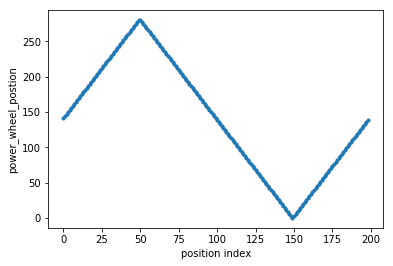

In [244]:
N = 100
power_wheel_position = np.linspace(0, 280, N)  #up sweep
power_wheel_position = np.concatenate(
    [power_wheel_position, power_wheel_position[::-1]])  #up down sweep
#zig_zag
power_wheel_position = np.concatenate([
    power_wheel_position[int(N / 2):3 * int(N / 2)],
    power_wheel_position[3 * int(N / 2):-1], power_wheel_position[0:int(N / 2)]])

plt.plot(power_wheel_position, '.', label='power_wheel_postion')
plt.ylabel('power_wheel_postion')
plt.xlabel('position index')

#  summary

total acquisition time (sec): 315.0


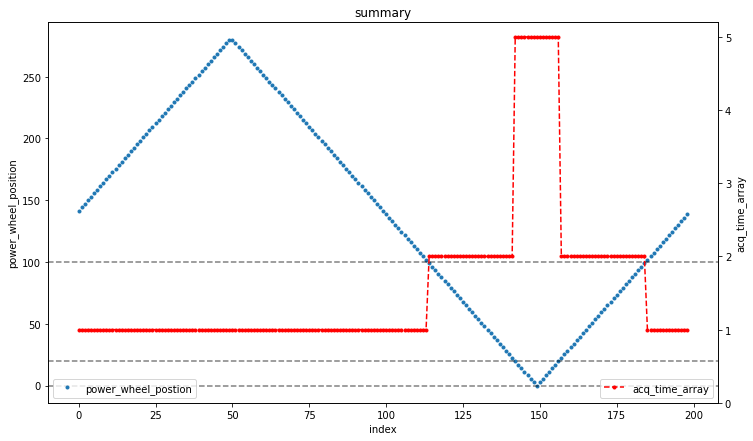

In [245]:
acq_time_array = calc_acq_time_array_manual_input(power_wheel_position, pos_vs_acqtime)

plt.figure(figsize=(12,7))
plt.title('summary')
plt.plot(power_wheel_position,'.', label='power_wheel_postion')
for p,t in np.array(pos_vs_acqtime):
    plt.axhline(p,color='k',ls='--', alpha=0.5)
plt.ylabel('power_wheel_position')
plt.xlabel('index')

plt.legend(loc=3)
plt.twinx()
plt.plot(acq_time_array, '--.', color='r', label='acq_time_array')
plt.ylabel('acq_time_array')
plt.legend(loc=4)
plt.ylim(0,None)

print('total acquisition time (sec):', acq_time_array.sum())

# Development

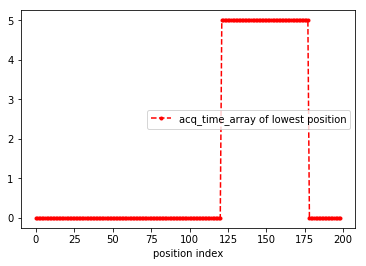

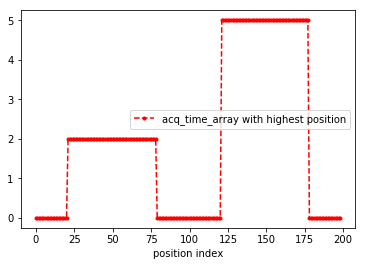

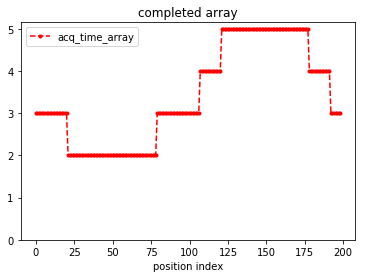

In [140]:
x = power_wheel_position
pos,time = np.array(pos_vs_acqtime).T
# lowest position
acq_time_array = np.piecewise(x, [x < pos[1], x >= pos[1]], [time[0], 0]) 
plt.figure()
plt.plot(acq_time_array, '--.', color='r', label='acq_time_array of lowest position')
plt.xlabel('position index')
plt.legend()
 #highest position
acq_time_array += np.piecewise(x, [x >= pos[-1], x < pos[-1]], [time[-1], 0])
plt.figure()
plt.plot(acq_time_array, '--.', color='r', label='acq_time_array with highest position')
plt.xlabel('position index')
plt.legend()
# all other
for i in range(1,len(pos)-1):
    t = np.piecewise(x, [x < pos[i], x >= pos[i], x >= pos[i+1]], [0, time[i], 0])
    acq_time_array += t    

plt.figure()
plt.title('completed array')
plt.plot(acq_time_array, '--.', color='r', label='acq_time_array')
plt.legend()
plt.ylim(0,None)
plt.xlabel('position index')

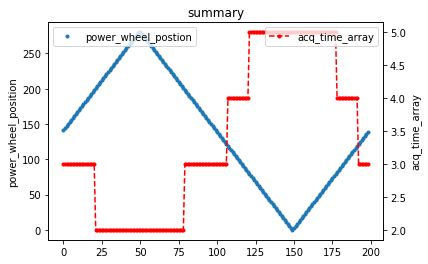

In [134]:
plt.figure()
plt.title('summary')
plt.plot(power_wheel_position,'.', label='power_wheel_postion')
plt.ylabel('power_wheel_position')
plt.legend(loc=2)
plt.twinx()
plt.plot(acq_time_array, '--.', color='r', label='acq_time_array')
plt.ylabel('acq_time_array')
plt.legend(loc=1)
plt.xlabel('index')

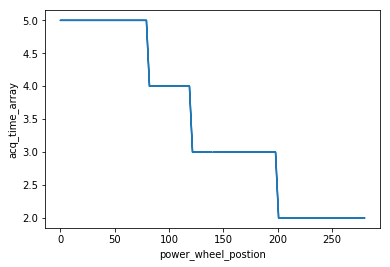

In [135]:
plt.figure()
plt.plot(power_wheel_position,acq_time_array)
plt.ylabel('acq_time_array')
plt.xlabel('power_wheel_postion')
plt.figure()

In [168]:
string = '0,1.3:3,2'
pos_vs_acqtime = []
for pair in string.split(':'):
    p,t = pair.split(',')
    pos_vs_acqtime.append((float(p),float(t)) )

In [167]:
string = '0,1.3, 3,2, 3,1'
np.fromstring(string, dtype=float, sep=(',') ).reshape(-1,2)

array([[0. , 1.3],
       [3. , 2. ],
       [3. , 1. ]])

In [220]:
string = '[ [1.3,3.2], [3.0,2.4] ]'
import json
np.array(json.loads(string))

array([[1.3, 3.2],
       [3. , 2.4]])

In [240]:
string = '1,2; 2.1,10;  0.1,2'
np.array( np.matrix(string) )

array([[ 1. ,  2. ],
       [ 2.1, 10. ],
       [ 0.1,  2. ]])

In [241]:
(12,1)+(3,5)

(12, 1, 3, 5)

In [242]:
np.array([[1,2]]).shape

(1, 2)